In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("shop.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data = df[["Annual Income (k$)","Spending Score (1-100)"]]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [13]:
data.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

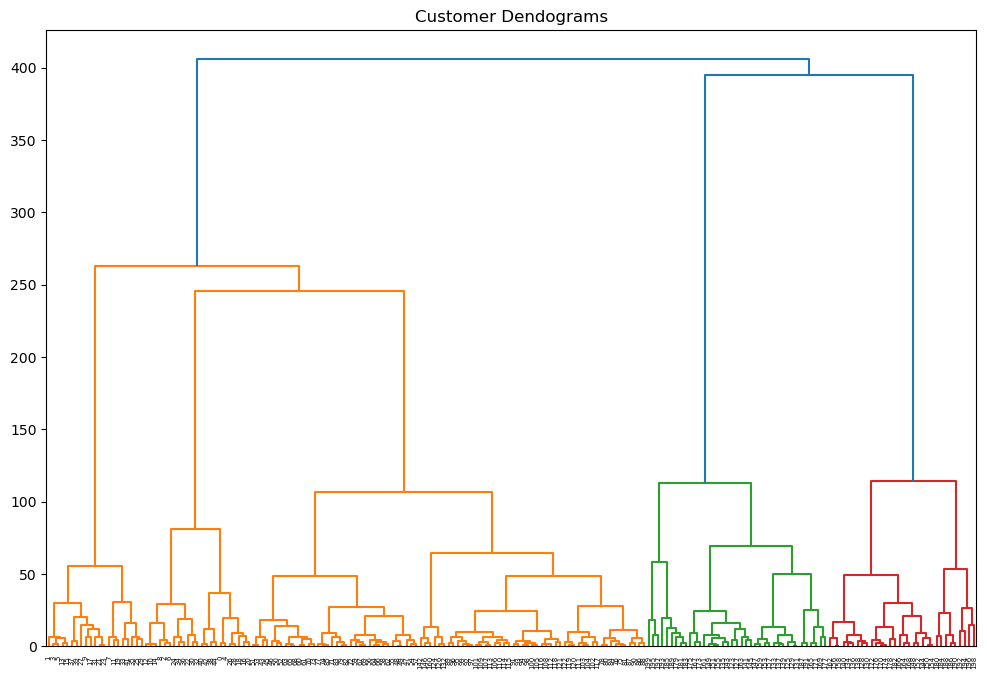

In [15]:
## Lets make the dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 8))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data,method='ward'))   #single,complete,average,ward 

In [16]:
## from the dendogram we can infer that there are 5 optimum clusters

In [17]:
## Appy Aglomerative clustering

from sklearn.cluster import AgglomerativeClustering

cluster1 = AgglomerativeClustering(n_clusters=5)
labels_=cluster1.fit_predict(data)

In [18]:
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [19]:
data["labels"] = labels_

In [21]:
data["labels"].value_counts()

1    85
2    39
0    32
4    23
3    21
Name: labels, dtype: int64

Text(0, 0.5, 'Spending score')

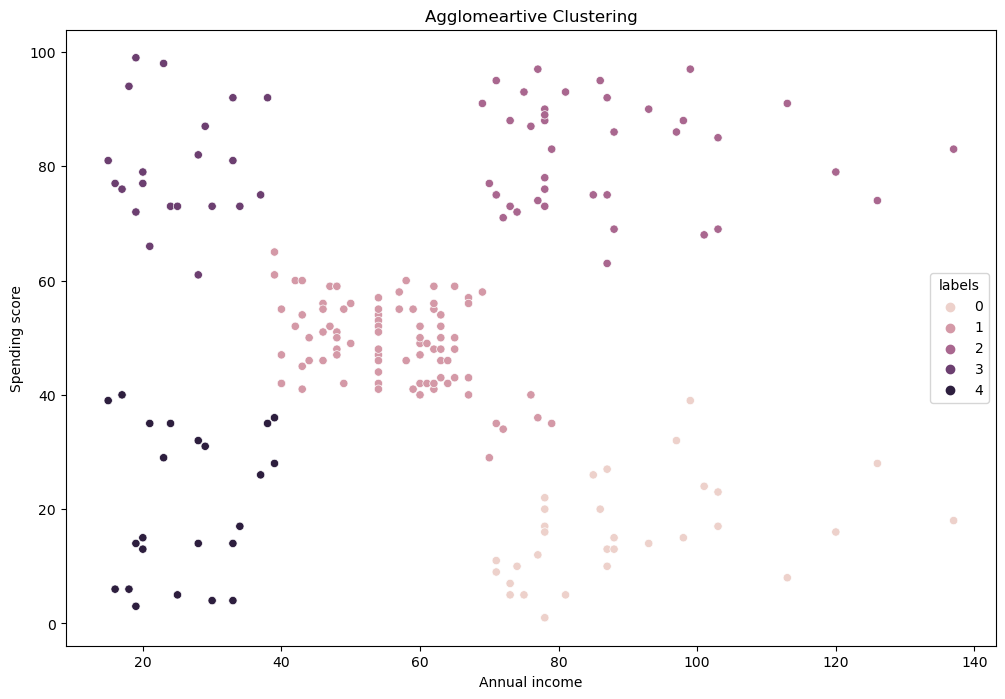

In [28]:
## Scatterplot

plt.figure(figsize = (12,8))
sns.scatterplot(x = data["Annual Income (k$)"],y = data["Spending Score (1-100)"],hue = data["labels"])
plt.title('Agglomeartive Clustering')
plt.xlabel('Annual income')
plt.ylabel('Spending score')